<a href="https://colab.research.google.com/github/yqwang1/Computational_Neuro/blob/main/PHAR0015_TD_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Lets first set up the model



In [ ]:
#for each trial we have 10 'states' that correspond to time

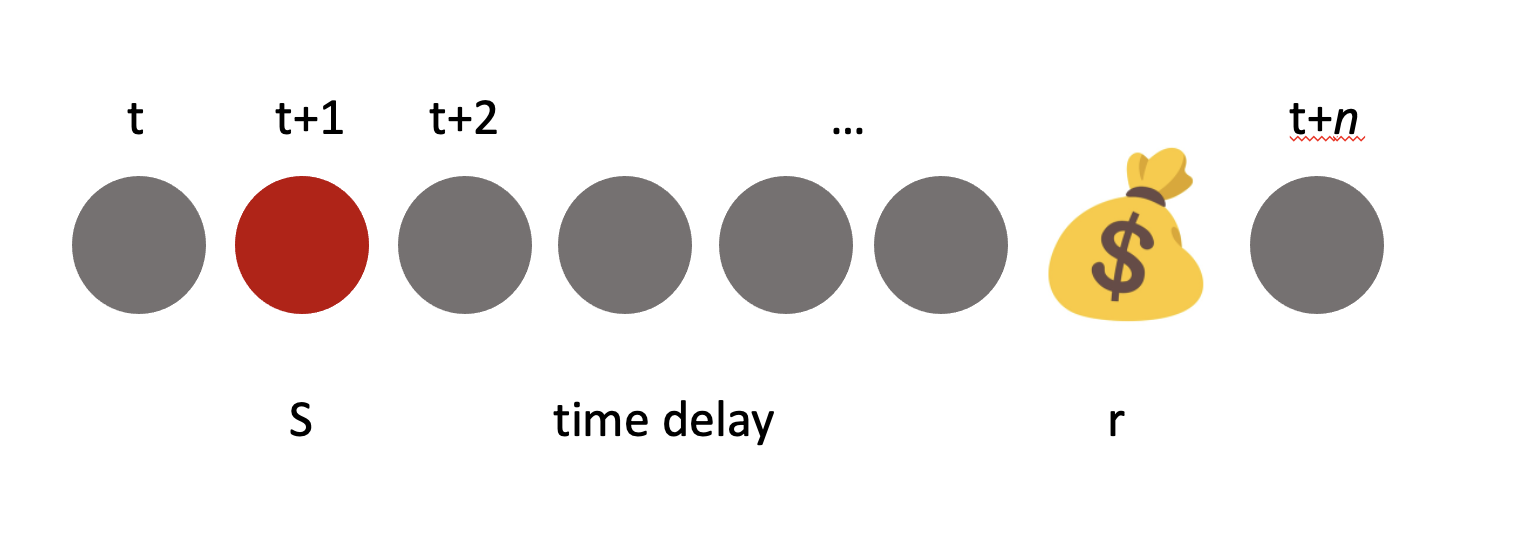

In [ ]:
# for an easy example lets make the learning rate quite high
c = 0.5

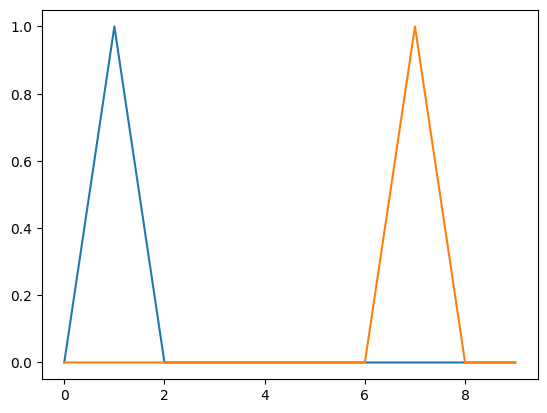

In [ ]:
# the trial starts on t = 0
# stimulus is on t = 1
# reward on t = 8

s = np.array([0,1,0,0,0,0,0,0,0,0])
r = np.array([0,0,0,0,0,0,0,1,0,0])
time = np.array([0,1,1,1,1,1,1,1,1,1])

plt.plot(s)
plt.plot(r)

In [ ]:
# lets look at trial 1

# first we have 10 states, each with V and delta
# V start at zero

v_t0 = [0,0,0,0,0,0,0,0,0,0]

#make a list to store the new V
v_t1 = []
dt = []

# first calculate delta for each state
# note that we compute delta as the reward minus both current reward, and EXPECTED reward for the next state
for index, state in enumerate (v_t0):
  if index < 9:
    d = r[index] - v_t0[index] + v_t0[index +1]
    dt.append(d)
# next do the rescorla wagner update
    v_t1.append(v_t0[index] +c * time[index] * d)
v_t1.append(0)

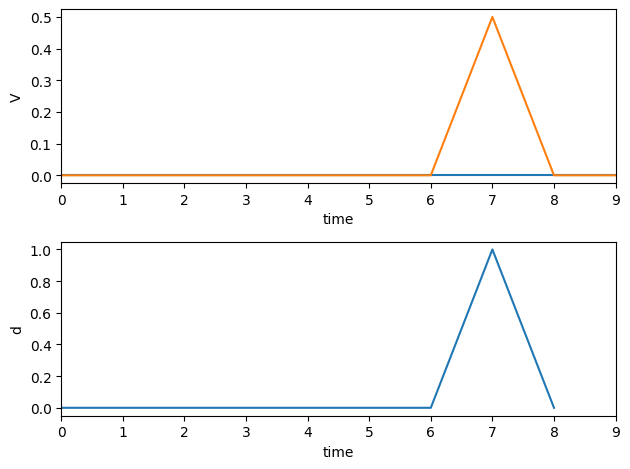

In [ ]:
plt.subplot(211)
plt.plot(v_t0)
plt.plot(v_t1)

plt.xlabel('time')
plt.ylabel('V')
plt.xlim(0,9)

plt.subplot(212)
plt.plot(dt)


plt.xlabel('time')
plt.ylabel('d')
plt.xlim(0,9)

plt.tight_layout()

In [ ]:
# as with previous RW models, only the immediate time has an increase in V - as all we have experienced is a surprising reward at time 7

In [ ]:
#what about the next update?

#make a list to store the new V
v_t2 = []
dt2 = []

# first calculate delta for each state
# note that we compute delta as the reward minus both current reward, and EXPECTED reward for the next state
for index, state in enumerate (v_t1):
  if index < 9:
    d = r[index] - v_t1[index] + v_t1[index +1]
    dt2.append(d)
# next do the rescorla wagner update
    v_t2.append(v_t1[index] +c * time[index] * d)
v_t2.append(0)

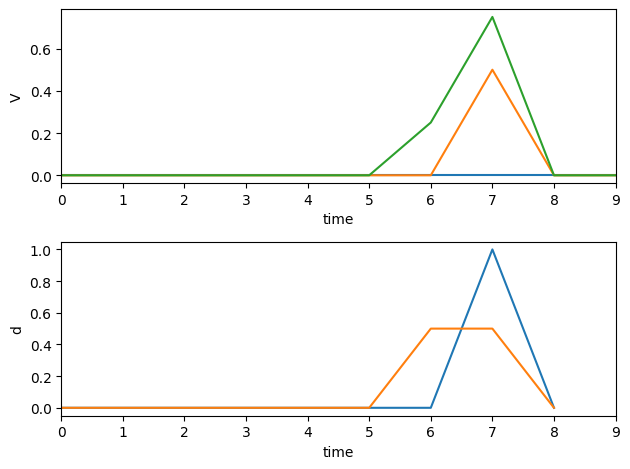

In [ ]:
plt.subplot(211)
plt.plot(v_t0)
plt.plot(v_t1)
plt.plot(v_t2)

plt.xlabel('time')
plt.ylabel('V')
plt.xlim(0,9)

plt.subplot(212)
plt.plot(dt)
plt.plot(dt2)


plt.xlabel('time')
plt.ylabel('d')
plt.xlim(0,9)

plt.tight_layout()

In [ ]:
# on the second trial, we again increase V at time 7, but also , because we had previously learned time 7 predicts reward, time 6 now also has predicted reward as well!

# what about trial 3?

In [ ]:
#make a list to store the new V
v_t3 = []
dt3 = []

# first calculate delta for each state
# note that we compute delta as the reward minus both current reward, and EXPECTED reward for the next state
for index, state in enumerate (v_t2):
  if index < 9:
    d = r[index] - v_t2[index] + v_t2[index +1]
    dt3.append(d)
# next do the rescorla wagner update
    v_t3.append(v_t2[index] +c * time[index] * d)
v_t3.append(0)

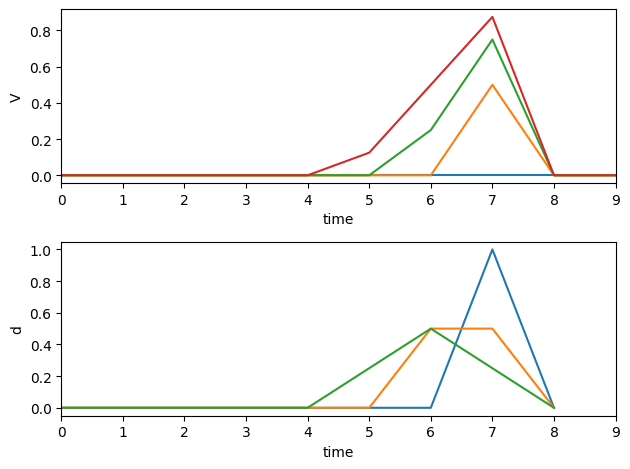

In [ ]:
plt.subplot(211)
plt.plot(v_t0)
plt.plot(v_t1)
plt.plot(v_t2)
plt.plot(v_t3)

plt.xlabel('time')
plt.ylabel('V')
plt.xlim(0,9)

plt.subplot(212)
plt.plot(dt)
plt.plot(dt2)
plt.plot(dt3)


plt.xlabel('time')
plt.ylabel('d')
plt.xlim(0,9)

plt.tight_layout()

In [ ]:
# its now moved even further back in time - to time 5!

Now lets write the code a bit more efficiently so we can run through lots of trials

In [ ]:
# the trial starts on t = 0
# stimulus is on t = 2
# reward on t = 8
# time states since the CS untill then endof the trial

s = np.array([0,0,1,0,0,0,0,0,0,0,0])
r = np.array([0,0,0,0,0,0,0,0,1,0,0])
time = np.array([0,0,1,1,1,1,1,1,1,1,1])

#make learning rate the same as our previous RW examples
c = 0.1

In [ ]:

# V starts at zero for all states

v_t0 = [0,0,0,0,0,0,0,0,0,0,0]

# make 100 trials
trials = np.arange(100)


#make a list to store the new V
v_t = []
d_t = []

#now do the update for all states on every trial

for trial in trials:
  # first calculate delta for each state

  # creat a temperary list to start V and d for each state

  v_temp = []
  d_temp = []
  # note that we compute delta as the reward minus both current reward, and EXPECTED reward for the next state
  for index, state in enumerate (v_t0):
    if index < 10:
      d = r[index] - v_t0[index] + v_t0[index +1]
      d_temp.append(d)
  # next do the rescorla wagner update
      v_temp.append(v_t0[index] +c * time[index] * d)
  v_temp.append(0.0)
  v_t0 = v_temp

  # now, for each trial append the V and d values for each timepoint

  v_t.append(v_temp)
  d_t.append(d_temp)


In [ ]:
#now we have 2, 2D arrays, one for V and one for d, that has each timepoint for every trial


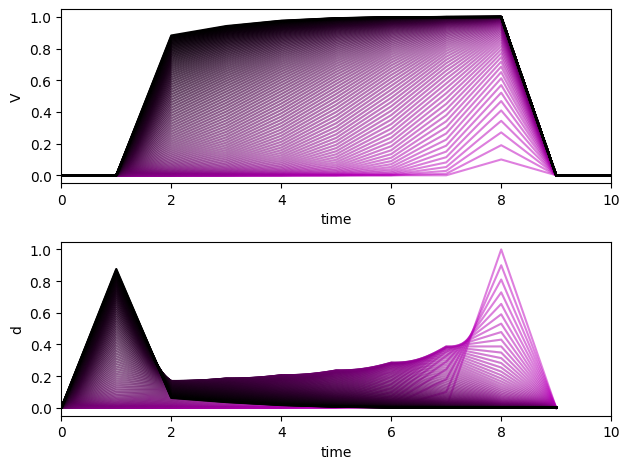

In [ ]:
plt.subplot(211)

for index, trials in enumerate(v_t):
  plt.plot(trials, color = 'k', alpha = (np.arange(100)/100)[index])
  plt.plot(trials, color = 'm', alpha = (0.5- np.arange(100)/200)[index])

plt.xlabel('time')
plt.ylabel('V')
plt.xlim(0,10)

plt.subplot(212)
for index, trials in enumerate(d_t):
  plt.plot(trials, color = 'k', alpha = (np.arange(100)/100)[index])
  plt.plot(trials, color = 'm', alpha = (0.5- np.arange(100)/200)[index])


plt.xlabel('time')
plt.ylabel('d')
plt.xlim(0,10)

plt.tight_layout()



(0.0, 10.0)

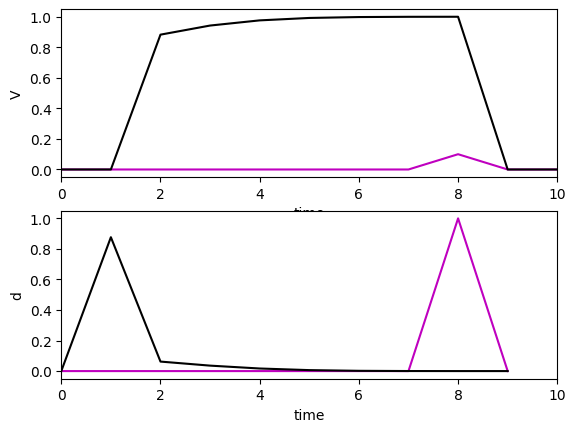

In [ ]:
plt.subplot(211)

plt.plot(v_t[0], color = 'm')
plt.plot(v_t[99], color = 'k')

plt.xlabel('time')
plt.ylabel('V')
plt.xlim(0,10)

plt.subplot(212)

plt.plot(d_t[0], color = 'm')
plt.plot(d_t[99], color = 'k')

plt.xlabel('time')
plt.ylabel('d')
plt.xlim(0,10)

In [ ]:
# import seaborn as sns

# plt.subplot(211)
# sns.heatmap(data = v_t)

# plt.subplot(212)
# sns.heatmap(data = d_t)